In [1]:
import pandas as pd

table = pd.DataFrame(index=['Bowl 1', 'Bowl 2'])

In [2]:
from empiricaldist import Pmf

coin = Pmf()
coin['heads'] = 1/2
coin['tails'] = 1/2
coin

,probs
heads,0.5
tails,0.5


In [3]:
prior = Pmf.from_seq(['Bowl 1', 'Bowl 2'])
prior

,probs
Bowl 1,0.5
Bowl 2,0.5


In [4]:
likelihood_vanilla = [0.75, 0.5]
posterior = prior * likelihood_vanilla
posterior

,probs
Bowl 1,0.375
Bowl 2,0.250


In [5]:
posterior.normalize()

0.625

In [6]:
posterior

,probs
Bowl 1,0.6
Bowl 2,0.4


In [7]:
posterior *= likelihood_vanilla
posterior.normalize()
posterior

,probs
Bowl 1,0.692308
Bowl 2,0.307692


In [8]:
likelihood_chocolate = [0.25, 0.5]
posterior *= likelihood_chocolate
posterior.normalize()
posterior

,probs
Bowl 1,0.529412
Bowl 2,0.470588


In [9]:
import numpy as np

hypos = np.arange(101)
hypos

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100])

In [10]:
prior = Pmf(1, hypos)
prior.normalize()
prior.head(5)

,probs
0,0.009901
1,0.009901
2,0.009901
3,0.009901
4,0.009901


In [11]:
likelihood_vanilla = hypos/100
likelihood_vanilla[:5]

array([0.  , 0.01, 0.02, 0.03, 0.04])

In [12]:
posterior1 = prior * likelihood_vanilla
posterior1.normalize()
posterior1.head(5)

,probs
0,0.000000
1,0.000198
2,0.000396
3,0.000594
4,0.000792


In [13]:
posterior2 = posterior1 * likelihood_vanilla
posterior2.normalize()
posterior2.head(5)

,probs
0,0.000000
1,0.000003
2,0.000012
3,0.000027
4,0.000047


In [14]:
posterior3 = posterior2 * likelihood_vanilla
posterior3.normalize()
posterior3.head(5)

,probs
0,0.000000e+00
1,3.921184e-08
2,3.136947e-07
3,1.058720e-06
4,2.509558e-06


<Axes: >

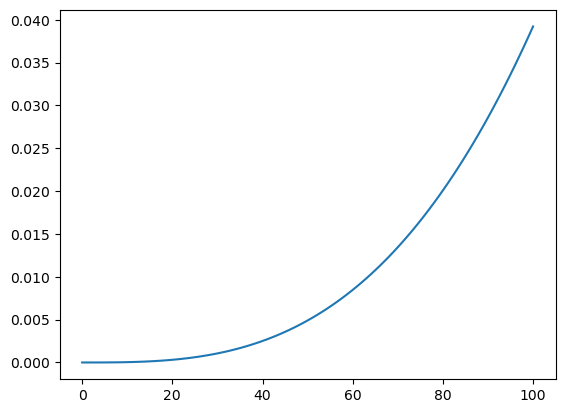

In [15]:
posterior3.plot()

<Axes: >

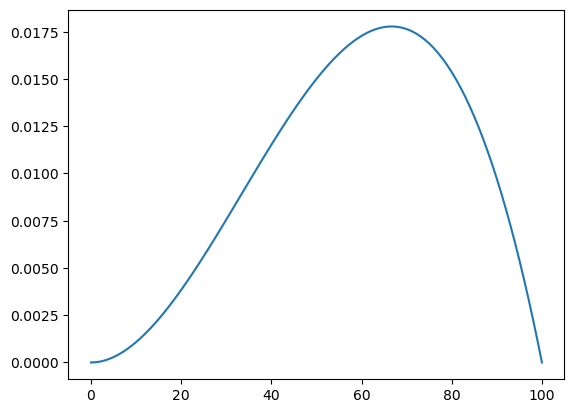

In [16]:
likelihood_chocolate = 1 - hypos/100

posterior3 = posterior2 * likelihood_chocolate
posterior3.normalize()
posterior3.plot()

In [17]:
posterior3.idxmax()

67

In [18]:
hypos = [6, 8, 12]
prior = Pmf(1/3, hypos)
prior

,probs
6,0.333333
8,0.333333
12,0.333333


In [19]:
likelihood1 = 1/6, 1/8, 1/12

In [20]:
likelihood1 = 1/np.array(hypos)
posterior = prior * likelihood1
posterior.normalize()
posterior

,probs
6,0.444444
8,0.333333
12,0.222222


In [21]:
def update_dice(pmf, data):
    """Update pmf based on new data."""
    hypos = pmf.qs
    likelihood = 1 / hypos
    impossible = (data > hypos)
    likelihood[impossible] = 0
    pmf *= likelihood
    pmf.normalize()

In [22]:
pmf = prior.copy()
update_dice(pmf, 1)
update_dice(pmf, 7)
pmf

,probs
6,0.000000
8,0.692308
12,0.307692


In [23]:
from fractions import Fraction

i = Fraction(1,300)
f = Fraction(1,125)
twin = i + f

i / twin

Fraction(5, 17)

In [37]:
from scipy.stats import binom

n = 20
p = 0.5
k = 5

binom.pmf(k, n, p)

0.01478576660156255

In [39]:
n = 20
p = 0.5
k = 5

ks = np.arange(k+1)

ps = binom.pmf(ks, n, p)
ps.sum()

0.020694732666015674

In [40]:
pmf_k = Pmf(ps, ks)
pmf_k

,probs
0,9.536743e-07
1,1.907349e-05
2,1.811981e-04
3,1.087189e-03
4,4.620552e-03
5,1.478577e-02


In [41]:
def make_binomial(n, p):
    """Make a binomial Pmf."""
    ks = np.arange(n+1)
    ps = binom.pmf(ks, n, p)
    return Pmf(ps, ks)

<Axes: >

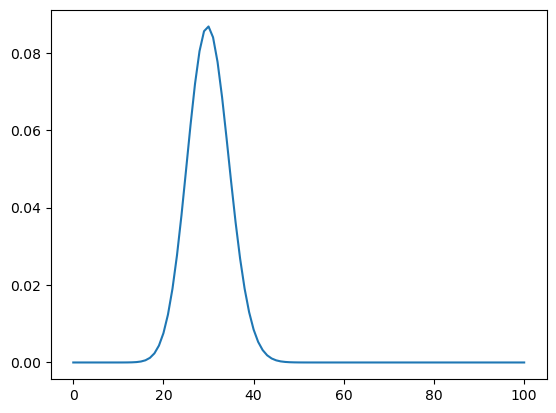

In [48]:
pmf_k = make_binomial(n=100, p=0.3)
pmf_k.plot()

In [49]:
pmf_k.max_prob()

30

In [51]:
pmf_k[pmf_k.max_prob()]

0.08678386475342809

<Axes: >

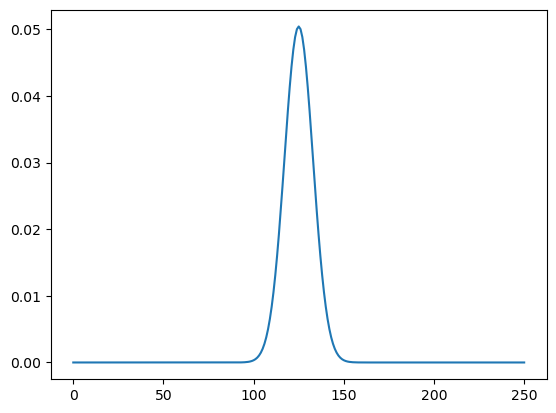

In [52]:
pmf_k = make_binomial(n=250, p=0.5)
pmf_k.plot()

In [61]:
pmf_k[pmf_k.qs>139].sum()*2

0.06642115124004332

In [62]:
def prob_ge(pmf, threshold):
    """Probability of quantities greater than threshold."""
    ge = (pmf.qs >= threshold)
    total = pmf[ge].sum()
    return total

In [63]:
pmf_k.prob_ge(140)

0.03321057562002166

In [65]:
hypos = np.linspace(0, 1, 101)
prior = Pmf(1, hypos)
prior

,probs
0.00,1
0.01,1
0.02,1
0.03,1
0.04,1
...,...
0.96,1
0.97,1
0.98,1
0.99,1


In [66]:
likelihood_heads = hypos
likelihood_tails = 1 - hypos

likelihood = {
    'H': likelihood_heads,
    'T': likelihood_tails
}


dataset = 'H' * 140 + 'T' * 110

In [68]:
dataset[:5]

'HHHHH'

In [70]:
def update_euro(pmf, dataset):
    """Update pmf with a given sequence of H and T."""
    for data in dataset:
        pmf *= likelihood[data]

    pmf.normalize()

<Axes: >

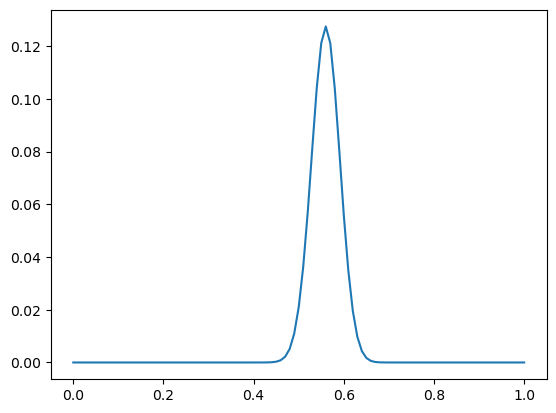

In [71]:
posterior = prior.copy()
update_euro(posterior, dataset)
posterior.plot()

In [72]:
posterior.max_prob()

0.56

In [74]:
uniform = Pmf(1, hypos, name='uniform')
uniform.normalize()

101

In [78]:
ramp_up = np.arange(50)
ramp_down = np.arange(50, -1, -1)

a = np.append(ramp_up, ramp_down)

triangle = Pmf(a, hypos, name='triangle')
triangle.normalize()

2500

<Axes: >

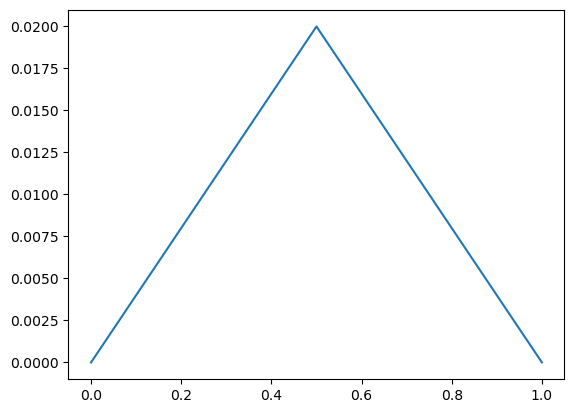

In [79]:
triangle.plot()

In [80]:
update_euro(uniform, dataset)
update_euro(triangle, dataset)

<Axes: >

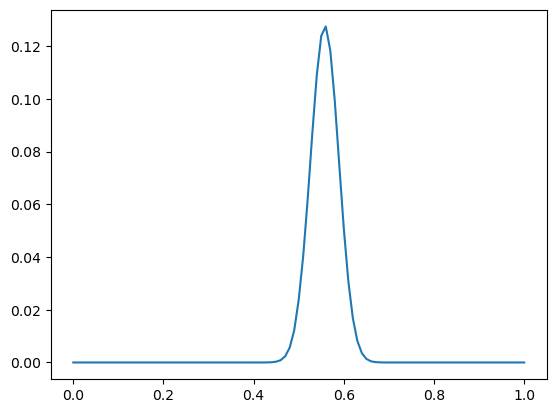

In [82]:
triangle.plot()

In [83]:
from scipy.stats import binom

def update_binomial(pmf, data):
    """Update pmf using the binomial distribution."""
    k, n = data
    xs = pmf.qs
    likelihood = binom.pmf(k, n, xs)
    pmf *= likelihood
    pmf.normalize()

In [84]:
uniform2 = Pmf(1, hypos, name='uniform2')
data = 140, 250
update_binomial(uniform2, data)

In [85]:
np.allclose(uniform, uniform2)

True

In [110]:
(0.2+0.33)/2

0.265

In [156]:
likelihood['H']

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])

In [157]:
hypos = np.linspace(0, 1, 101)

left_side = np.linspace(0,1, 21)
middle = np.array([1 for _ in range(12)])
right_side = np.linspace(1,0, 68)

distrib = np.concatenate((left_side, middle, right_side))

triangle = Pmf(distrib, hypos, name='triangle')
triangle.normalize()

56.5

<Axes: >

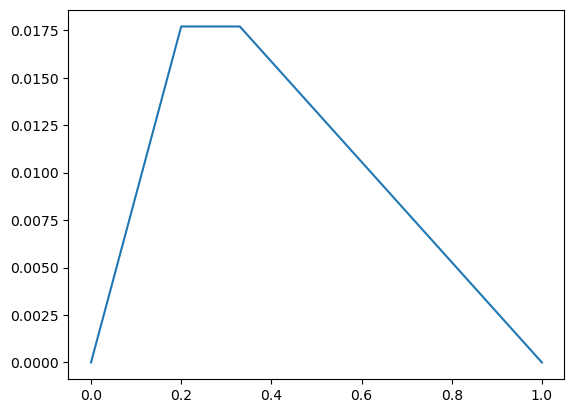

In [158]:
triangle.plot()

In [161]:
triangle

,probs
0.00,0.000000
0.01,0.000885
0.02,0.001770
0.03,0.002655
0.04,0.003540
...,...
0.96,0.001057
0.97,0.000792
0.98,0.000528
0.99,0.000264


In [170]:
likelihood = np.array(triangle.index.to_list())

In [171]:
triangle *= likelihood**3
triangle.normalize()

0.13140381061946904

<Axes: >

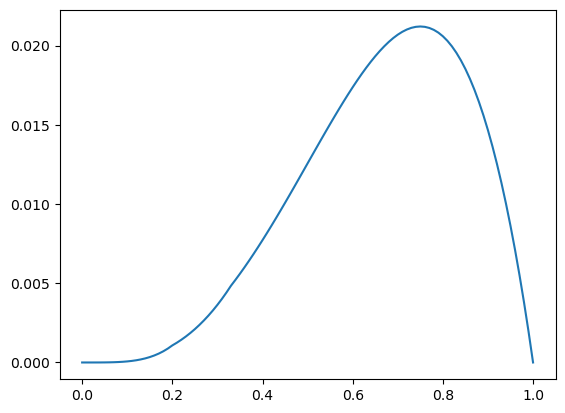

In [172]:
triangle.plot()

In [179]:
triangle.max_prob()

0.75

In [173]:
hypos = np.linspace(0, 1, 101)
prior = Pmf(1, hypos)



In [175]:
prior *= likelihood**3
prior.normalize()

25.502500000000005

<Axes: >

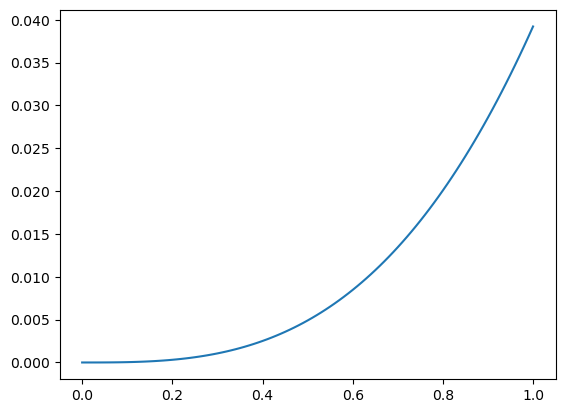

In [176]:
prior.plot()